In [0]:
import pandas as pd
import numpy as np
from numpy.random import seed
import os
import matplotlib.pyplot as plt
from PIL import Image
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [0]:
seed(88)
tf.random.set_seed(88)

In [0]:
# empty list to store all image array
images_data = []

# empty list to store all the corresponding labels
images_labels = []

In [48]:
#all the folders or labels
for i in range(4):
    
    # the directory that has all folders with images
    path = f'/content/car/car/{i}/'
    images = os.listdir(path)

    # loop through each image in the folder
    for image in images:
        
        # open each image
        img = Image.open(path + image)
        
        # convert image to array
        img_array = np.array(img)
        
        # add each array to the images_data list
        images_data.append(img_array)
        
        # add the label to the images_labels list
        images_labels.append(i)

    #progress report for each folder
    print(f'Completed folder {i}.')

Completed folder 0.
Completed folder 1.
Completed folder 2.
Completed folder 3.


In [0]:
#convert list to arrays

images_array = np.array(images_data)

labels_array = np.array(images_labels)

In [50]:
# images array shape
images_array.shape

(9588, 256, 256, 3)

In [51]:
# label_array shape

labels_array.shape

(9588,)

In [97]:
np.unique(labels_array, return_counts=True)

(array([0, 1, 2, 3]), array([2388, 2400, 2400, 2400]))

In [0]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(images_array,
                                                    labels_array,
                                                    random_state = 888,
                                                    stratify = labels_array)

In [0]:
# add in a validation set. 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size = 0.2,
                                                 random_state = 888,
                                                 stratify = y_train)

In [0]:
# convert labels to categories
y_train_oh = to_categorical(y_train, 4)
y_val_oh = to_categorical(y_val, 4)

In [0]:
# epochs for CNN model
epochs = 30

In [81]:
# CNN model
%%time


# CNN model structure
car_cnn = Sequential()
car_cnn.add(Conv2D(filters=32, kernel_size=(7,7), activation='relu', input_shape=X_train.shape[1:]))
car_cnn.add(Conv2D(filters=32, kernel_size=(7,7), activation='relu'))
car_cnn.add(MaxPool2D(pool_size=(2, 2)))
car_cnn.add(Dropout(rate=0.25))
car_cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
car_cnn.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
car_cnn.add(MaxPool2D(pool_size=(2, 2)))
car_cnn.add(Dropout(rate=0.25))
car_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
car_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
car_cnn.add(MaxPool2D(pool_size=(2, 2)))
car_cnn.add(Dropout(rate=0.25))
car_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
car_cnn.add(MaxPool2D(pool_size=(2, 2)))
car_cnn.add(Dropout(rate=0.25))
car_cnn.add(Flatten())
car_cnn.add(Dense(256, activation='relu'))
car_cnn.add(Dropout(rate=0.5))
car_cnn.add(Dense(4, activation='softmax'))

# Compile the model
car_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
hist = car_cnn.fit(X_train, y_train_oh, 
                   batch_size=32, 
                   epochs=epochs, 
                   validation_data=(X_val, y_val_oh))



Train on 5752 samples, validate on 1439 samples
Epoch 1/30
5752/5752 [==============================] - 48s 8ms/step - loss: 2.4228 - accuracy: 0.2719 - val_loss: 1.3778 - val_accuracy: 0.3044
Epoch 2/30
5752/5752 [==============================] - 41s 7ms/step - loss: 1.3233 - accuracy: 0.3707 - val_loss: 1.3287 - val_accuracy: 0.3641
Epoch 3/30
5752/5752 [==============================] - 41s 7ms/step - loss: 1.2396 - accuracy: 0.4339 - val_loss: 1.1894 - val_accuracy: 0.4732
Epoch 4/30
5752/5752 [==============================] - 41s 7ms/step - loss: 1.1134 - accuracy: 0.5101 - val_loss: 1.0188 - val_accuracy: 0.5671
Epoch 5/30
5752/5752 [==============================] - 41s 7ms/step - loss: 0.9896 - accuracy: 0.5921 - val_loss: 0.9901 - val_accuracy: 0.5615
Epoch 6/30
5752/5752 [==============================] - 41s 7ms/step - loss: 0.8332 - accuracy: 0.6638 - val_loss: 0.7550 - val_accuracy: 0.7304
Epoch 7/30
5752/5752 [==============================] - 41s 7ms/step - loss: 0.679

In [82]:
car_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 250, 250, 32)      4736      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 244, 244, 32)      50208     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 122, 122, 32)      0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 118, 118, 64)      51264     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 114, 114, 64)      102464    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 57, 57, 64)      

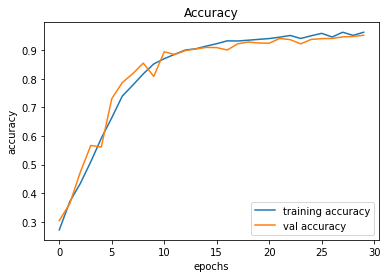

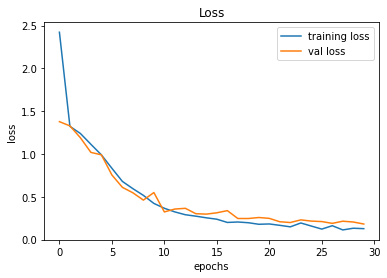

In [83]:
# plotting graphs for accuracy and losses
plt.figure(0)
plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='val loss')
#plt.axis([0, 10, 0, 2])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
y_pred = car_cnn.predict_classes(X_test)

In [91]:
car_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
car_cm

,0,1,2,3
0,584,1,1,11
1,8,568,7,17
2,20,6,552,22
3,11,8,12,569


In [94]:
car_correct = np.sum([y_test == y_pred])
car_correct

2273

In [95]:
(car_correct / len(y_test))

0.9482686691697956

In [0]:
#save the model for other use

car_cnn.save('./car_final.h5')